In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from xgboost import XGBClassifier

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from sklearn.svm import LinearSVC, SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import time as timer

In [6]:
import warnings
warnings.filterwarnings('ignore')
import os
import csv
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [7]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
import time as timer
from sklearn.inspection import permutation_importance
import itertools
import seaborn as sns
from sklearn.svm import LinearSVC,SVC
from sklearn.multiclass import OneVsRestClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LassoCV,LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier
from sklearn.feature_selection import chi2,SelectKBest,SelectFromModel,RFE,VarianceThreshold
from sklearn.metrics import confusion_matrix,precision_recall_curve,average_precision_score,roc_curve,auc,f1_score,accuracy_score,\
classification_report,multilabel_confusion_matrix, roc_auc_score,precision_recall_fscore_support
from sklearn.model_selection import cross_val_score,train_test_split,StratifiedKFold,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,LabelEncoder,LabelBinarizer
from scipy import interp
from itertools import cycle
plt.style.use('ggplot');
import sys
if ("/your/path/to/xelatex") not in sys.path:
    print('adding path') # I just add this to know if the path was present or not.
    sys.path.append("/your/path/to/xelatex")

adding path


In [8]:
from imblearn.over_sampling import SMOTE

In [9]:
from sklearn.metrics import precision_recall_curve

In [10]:
data = pd.read_stata('finalized_adverse_birth.dta')
data

,caseid,Residence,Mother_education,Sex_of_HH,mobile_phone,pregnancy_termination,deliver_by_CS,Smoke,Distance_to_HF,Working_status,...,ANC_visits,Maternal_anemia,Birth_interval,Wanted_pregnancy,First_ANC_check,Place_of_delivery,Country,Media_exposure,Regions,adverse_birth_outcome
0,00010008 02,rural,no education,male,no,no,yes,no,not a big problem,yes,...,no_visit,NaN,normal,wanted,NaN,facility,AO7,no,Centeral_Africa,posetive_outcome
1,00020001 01,urban,primary,female,no,no,no,no,not a big problem,yes,...,>=4,NaN,normal,wanted,Early,facility,AO7,no,Centeral_Africa,negative_outcome
2,00020006 01,urban,no education,female,no,no,no,no,not a big problem,no,...,>=4,NaN,normal,wanted,Early,facility,AO7,no,Centeral_Africa,negative_outcome
3,00020006 01,urban,no education,female,no,no,no,no,not a big problem,no,...,NaN,NaN,short,wanted,NaN,home,AO7,no,Centeral_Africa,negative_outcome
4,00020008 01,urban,primary,female,no,no,no,no,not a big problem,yes,...,no_visit,NaN,normal,wanted,NaN,home,AO7,no,Centeral_Africa,posetive_outcome
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139654,400 7 2,rural,secondary,male,no,no,no,no,not a big problem,no,...,>=4,not_anemic,NaN,wanted,Early,facility,ZW7,no,East_Africa,posetive_outcome
139655,400 19 2,rural,primary,male,no,no,no,no,not a big problem,no,...,>=4,not_anemic,long,wanted,late,home,ZW7,yes,East_Africa,posetive_outcome
139656,400 22 2,rural,secondary,male,yes,no,no,no,not a big problem,yes,...,1-3,not_anemic,long,wanted,late,facility,ZW7,yes,East_Africa,posetive_outcome
139657,400 24 1,rural,primary,female,yes,no,no,no,not a big problem,yes,...,>=4,not_anemic,normal,wanted,Early,facility,ZW7,yes,East_Africa,posetive_outcome


In [11]:
# Check for null values
null_values = data.isnull().sum()
print(null_values)

caseid                        0
Residence                     0
Mother_education              0
Sex_of_HH                     0
mobile_phone                  0
pregnancy_termination         0
deliver_by_CS              1346
Smoke                      6393
Distance_to_HF             2898
Working_status                0
sex_of_child                  0
Age_of_mother                 0
Religion                  10289
Number_of_children            0
Wealth_index                  0
Parity                        0
Ever_use_contraceptive        0
Marital_status                0
husband_education         21260
Iron_supplementation      32848
Type_of_pregnancy             0
ANC_visits                32848
Maternal_anemia           75791
Birth_interval            36839
Wanted_pregnancy           1720
First_ANC_check           34829
Place_of_delivery          1709
Country                       0
Media_exposure                0
Regions                       0
adverse_birth_outcome         0
dtype: i

In [12]:
# Display data types of each variable
print(data.dtypes)

caseid                      object
Residence                 category
Mother_education          category
Sex_of_HH                 category
mobile_phone              category
pregnancy_termination     category
deliver_by_CS             category
Smoke                     category
Distance_to_HF            category
Working_status            category
sex_of_child              category
Age_of_mother             category
Religion                  category
Number_of_children        category
Wealth_index              category
Parity                    category
Ever_use_contraceptive    category
Marital_status            category
husband_education         category
Iron_supplementation      category
Type_of_pregnancy         category
ANC_visits                category
Maternal_anemia           category
Birth_interval            category
Wanted_pregnancy          category
First_ANC_check           category
Place_of_delivery         category
Country                   category
Media_exposure      

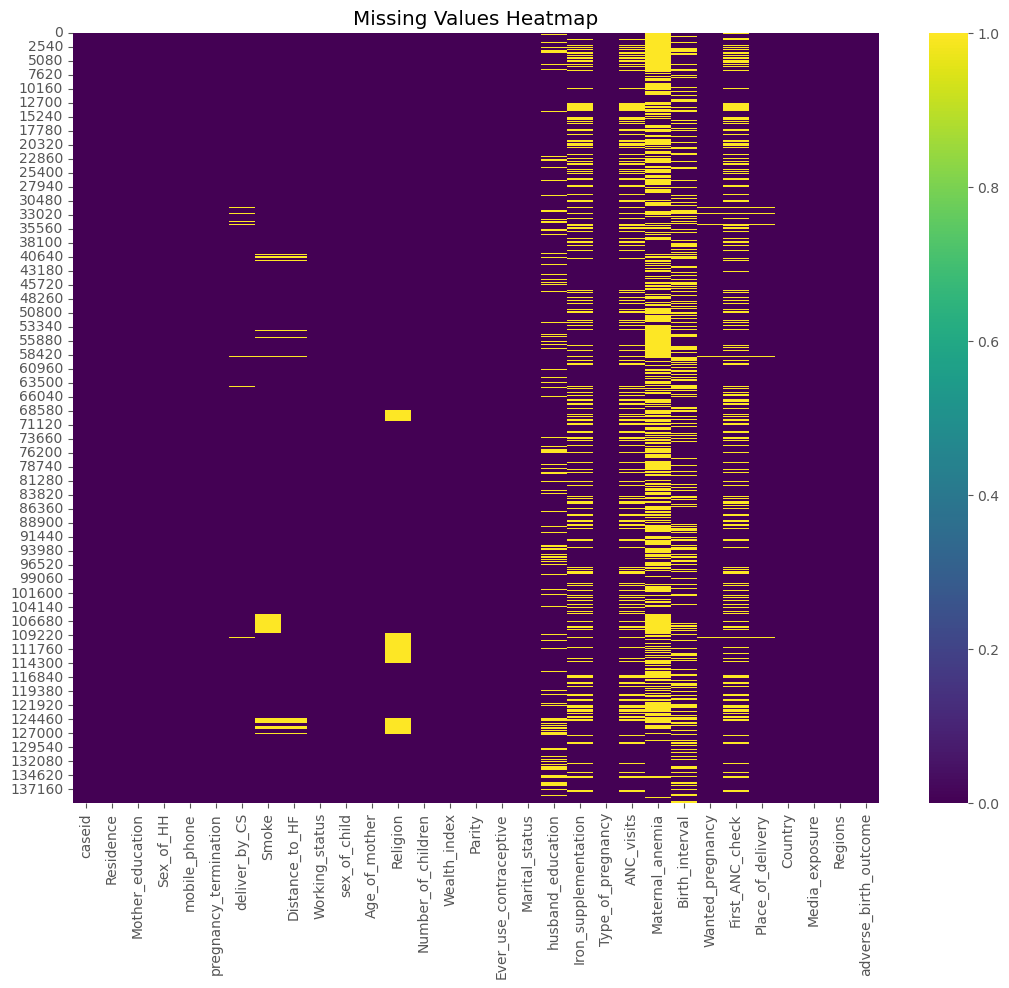

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 10))
sns.heatmap(data.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [14]:
# List unique labeled values for the "residence" column
labeled_values = data['Residence'].unique()
print(labeled_values)

['rural', 'urban']
Categories (2, object): ['urban' < 'rural']


In [15]:
data['Residence'] = data['Residence'].map({'urban':1, 'rural':2})

In [16]:
# List unique labeled values for the "residence" column
labeled_values = data['Residence'].unique()
print(labeled_values)

[2, 1]
Categories (2, int64): [1 < 2]


In [17]:
# List unique labeled values for the "Mother_education" column
labeled_values = data['Mother_education'].unique()
print(labeled_values)

['no education', 'primary', 'secondary', 'higher']
Categories (4, object): ['no education' < 'primary' < 'secondary' < 'higher']


In [18]:
data['Mother_education'] = data['Mother_education'].map({'no education':0, 'primary':1, 'secondary':2, 'higher':3 })

In [19]:
# List unique labeled values for the "Mother_education" column
labeled_values = data['Mother_education'].unique()
print(labeled_values)

[0, 1, 2, 3]
Categories (4, int64): [0 < 1 < 2 < 3]


In [20]:
data['Sex_of_HH'] = data['Sex_of_HH'].map({'male':1, 'female':2})

In [21]:
# List unique labeled values for the "Sex_of_HH" column
labeled_values = data['Sex_of_HH'].unique()
print(labeled_values)

[1, 2]
Categories (2, int64): [1 < 2]


In [22]:
# List unique labeled values for the "Sex_of_HH" column
labeled_values = data['Sex_of_HH'].unique()
print(labeled_values)

[1, 2]
Categories (2, int64): [1 < 2]


In [23]:
# List unique labeled values for the "mobile_phone" column
labeled_values = data['mobile_phone'].unique()
print(labeled_values)

['no', 'yes']
Categories (2, object): ['no' < 'yes']


In [24]:
data['mobile_phone'] = data['mobile_phone'].map({'no':0, 'yes':1})

In [25]:
# List unique labeled values for the "mobile_phone" column
labeled_values = data['mobile_phone'].unique()
print(labeled_values)

[0, 1]
Categories (2, int64): [0 < 1]


In [26]:
# List unique labeled values for the "pregnancy_termination" column
labeled_values = data['pregnancy_termination'].unique()
print(labeled_values)

['no', 'yes']
Categories (2, object): ['no' < 'yes']


In [27]:
data['pregnancy_termination'] = data['pregnancy_termination'].map({'no':0, 'yes':1})

In [28]:
# List unique labeled values for the "deliver_by_CS" column
labeled_values = data['deliver_by_CS'].unique()
print(labeled_values)

['yes', 'no', NaN]
Categories (2, object): ['no' < 'yes']


In [29]:
data['deliver_by_CS'] = data['deliver_by_CS'].map({'no':0, 'yes':1})

In [30]:
# List unique labeled values for the "deliver_by_CS" column
labeled_values = data['deliver_by_CS'].unique()
print(labeled_values)

[1, 0, NaN]
Categories (2, int64): [0 < 1]


In [31]:
# List unique labeled values for the "Smoke" column
labeled_values = data['Smoke'].unique()
print(labeled_values)

['no', 'yes', NaN]
Categories (2, object): ['no' < 'yes']


In [32]:
data['Smoke'] = data['Smoke'].map({'no':0, 'yes':1})

In [33]:
# List unique labeled values for the "Smoke" column
labeled_values = data['Smoke'].unique()
print(labeled_values)

[0, 1, NaN]
Categories (2, int64): [0 < 1]


In [34]:
# List unique labeled values for the "Distance_to_HF" column
labeled_values = data['Distance_to_HF'].unique()
print(labeled_values)

['not a big problem', 'big problem', NaN]
Categories (2, object): ['big problem' < 'not a big problem']


In [35]:
data['Distance_to_HF'] = data['Distance_to_HF'].map({'big problem':0, 'not a big problem':1})

In [36]:
# List unique labeled values for the "Distance_to_HF" column
labeled_values = data['Distance_to_HF'].unique()
print(labeled_values)

[1, 0, NaN]
Categories (2, int64): [0 < 1]


In [37]:
# List unique labeled values for the "Distance_to_HF" column
labeled_values = data['Working_status'].unique()
print(labeled_values)

['yes', 'no']
Categories (2, object): ['no' < 'yes']


In [38]:
data['Working_status'] = data['Working_status'].map({'no':0, 'yes':1})

In [39]:
# List unique labeled values for the "Distance_to_HF" column
labeled_values = data['sex_of_child'].unique()
print(labeled_values)

['male', 'female']
Categories (2, object): ['male' < 'female']


In [40]:
data['sex_of_child'] = data['sex_of_child'].map({'male':1, 'female':2})

In [41]:
# List unique labeled values for the "Distance_to_HF" column
labeled_values = data['Age_of_mother'].unique()
print(labeled_values)

['40-49', '20-29', '30-39', '15-19']
Categories (4, object): ['15-19' < '20-29' < '30-39' < '40-49']


In [42]:
data['Age_of_mother'] = data['Age_of_mother'].map({'15-19':1, '20-29':2, '30-39':3, '40-49':4})

In [43]:
# List unique labeled values for the "Distance_to_HF" column
labeled_values = data['Religion'].unique()
print(labeled_values)

['protestant', 'assembly_of_god', 'catholic', 'jehovah', 'methodist', ..., 'no_religion', 'islamic', 'other', 'animist', NaN]
Length: 11
Categories (10, object): ['catholic' < 'methodist' < 'assembly_of_god' < 'universal' ... 'islamic' < 'animist' < 'no_religion' < 'other']


In [44]:
# List all unique values in the "residence" column
unique_values = data['Religion'].unique()
print(unique_values)

['protestant', 'assembly_of_god', 'catholic', 'jehovah', 'methodist', ..., 'no_religion', 'islamic', 'other', 'animist', NaN]
Length: 11
Categories (10, object): ['catholic' < 'methodist' < 'assembly_of_god' < 'universal' ... 'islamic' < 'animist' < 'no_religion' < 'other']


In [45]:
data['Religion'] = data['Religion'].map({'catholic':1, 'methodist':2, 'assembly_of_god':3, 'universal':4, 'jehovah':5, 'protestant':6, 'islamic':7, 'animist':8, 'no_religion':9, 'other':10})

In [46]:
# List all unique values in the "residence" column
unique_values = data['Religion'].unique()
print(unique_values)

[6, 3, 1, 5, 2, ..., 9, 7, 10, 8, NaN]
Length: 11
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]


In [47]:
# List all unique values in the "residence" column
unique_values = data['Number_of_children'].unique()
print(unique_values)

['<=4', '>4']
Categories (2, object): ['<=4' < '>4']


In [48]:
data['Number_of_children'] = data['Number_of_children'].map({'<=4':1, '>4':2})

In [49]:
# List all unique values in the "residence" column
unique_values = data['Wealth_index'].unique()
print(unique_values)

['poor', 'middle', 'rich']
Categories (3, object): ['poor' < 'middle' < 'rich']


In [50]:
data['Wealth_index'] = data['Wealth_index'].map({'poor':0, 'middle':1, 'rich':2})

In [51]:
# List all unique values in the "residence" column
unique_values = data['Parity'].unique()
print(unique_values)

['grand_multiparous', 'multiparous', 'primiparous/1st_time_mothers']
Categories (3, object): ['primiparous/1st_time_mothers' < 'multiparous' < 'grand_multiparous']


In [52]:
data['Parity'] = data['Parity'].map({'primiparous/1st_time_mothers':0, 'multiparous':1, 'grand_multiparous':2})

In [53]:
# List all unique values in the "residence" column
unique_values = data['Parity'].unique()
print(unique_values)

[2, 1, 0]
Categories (3, int64): [0 < 1 < 2]


In [54]:
# List all unique values in the "residence" column
unique_values = data['Ever_use_contraceptive'].unique()
print(unique_values)

['no', 'yes']
Categories (2, object): ['yes' < 'no']


In [55]:
data['Ever_use_contraceptive'] = data['Ever_use_contraceptive'].map({'no':0, 'yes':1})

In [56]:
# List all unique values in the "residence" column
unique_values = data['Marital_status'].unique()
print(unique_values)

['married', 'divorced/separated', 'single', 'widowed']
Categories (4, object): ['single' < 'married' < 'widowed' < 'divorced/separated']


In [57]:
data['Marital_status'] = data['Marital_status'].map({'married':1, 'divorced/separated':2, 'single':3, 'widowed':4})

In [58]:
# List all unique values in the "residence" column
unique_values = data['husband_education'].unique()
print(unique_values)

['primary', 'no_education', NaN, 'secondary', 'higher']
Categories (4, object): ['no_education' < 'primary' < 'secondary' < 'higher']


In [59]:
data['husband_education'] = data['husband_education'].map({'no education':0, 'primary':1, 'secondary':2, 'higher':3 })

In [60]:
# List all unique values in the "residence" column
unique_values = data['adverse_birth_outcome'].unique()
print(unique_values)

['posetive_outcome', 'negative_outcome']
Categories (2, object): ['posetive_outcome' < 'negative_outcome']


In [61]:
data['adverse_birth_outcome'] = data['adverse_birth_outcome'].map({'posetive_outcome':0, 'negative_outcome':1})

In [62]:
# List all unique values in the "residence" column
unique_values = data['adverse_birth_outcome'].unique()
print(unique_values)

[0, 1]
Categories (2, int64): [0 < 1]


In [63]:
# List all unique values in the "residence" column
unique_values = data['Iron_supplementation'].unique()
print(unique_values)

['not_supplemented', NaN, 'supplemented']
Categories (2, object): ['not_supplemented' < 'supplemented']


In [64]:
data['Iron_supplementation'] = data['Iron_supplementation'].map({'not_supplemented':0, 'supplemented':1})

In [65]:
# List all unique values in the "residence" column
unique_values = data['Type_of_pregnancy'].unique()
print(unique_values)

['single_birth', 'twin_birth']
Categories (2, object): ['single_birth' < 'twin_birth']


In [66]:
data['Type_of_pregnancy'] = data['Type_of_pregnancy'].map({'single_birth':0, 'twin_birth':1})

In [67]:
# List all unique values in the "residence" column
unique_values = data['ANC_visits'].unique()
print(unique_values)

['no_visit', '>=4', NaN, '1-3']
Categories (3, object): ['no_visit' < '1-3' < '>=4']


In [68]:
data['ANC_visits'] = data['ANC_visits'].map({'no_visit':0, '1-3':1, '>=4':2})

In [69]:
# List all unique values in the "residence" column
unique_values = data['Maternal_anemia'].unique()
print(unique_values)

[NaN, 'not_anemic', 'anemic']
Categories (2, object): ['anemic' < 'not_anemic']


In [70]:
data['Maternal_anemia'] = data['Maternal_anemia'].map({'not_anemic':0, 'anemic':1})

In [71]:
# List all unique values in the "residence" column
unique_values = data['Birth_interval'].unique()
print(unique_values)

['normal', 'short', 'long', NaN]
Categories (3, object): ['short' < 'normal' < 'long']


In [72]:
data['Birth_interval'] = data['Birth_interval'].map({'short':0, 'normal':1, 'long':2})

In [73]:
# List all unique values in the "residence" column
unique_values = data['Wanted_pregnancy'].unique()
print(unique_values)

['wanted', 'not_wanted', NaN]
Categories (2, object): ['not_wanted' < 'wanted']


In [74]:
data['Wanted_pregnancy'] = data['Wanted_pregnancy'].map({'not_wanted':0, 'wanted':1})

In [75]:
# List all unique values in the "residence" column
unique_values = data['First_ANC_check'].unique()
print(unique_values)

[NaN, 'Early', 'late']
Categories (2, object): ['late' < 'Early']


In [76]:
data['First_ANC_check'] = data['First_ANC_check'].map({'late':0, 'Early':1})

In [77]:
# List all unique values in the "residence" column
unique_values = data['Place_of_delivery'].unique()
print(unique_values)

['facility', 'home', NaN]
Categories (2, object): ['home' < 'facility']


In [78]:
data['Place_of_delivery'] = data['Place_of_delivery'].map({'home':0, 'facility':1})

In [79]:
# List all unique values in the "residence" column
unique_values = data['Country'].unique()
print(unique_values)

['AO7', 'BF8', 'BJ7', 'BU7', 'CI8', ..., 'TZ8', 'UG7', 'ZA7', 'ZM7', 'ZW7']
Length: 26
Categories (26, object): ['AO7' < 'BF8' < 'BJ7' < 'BU7' ... 'UG7' < 'ZA7' < 'ZM7' < 'ZW7']


In [80]:
data['Country'] = data['Country'].map({'AO7':1, 'BF8':2, 'BJ7':3, 'BU7':4, 'CI8':5, 'CM7':6, 'ET7':7, 'GA7':8, 'GH8':9, 'GM7':10, 'GN7':11, 'KE8':12, 'LB7':13, 'MD7':14, 'ML7':15, 'MR7':16, 'MW7':17, 'NG7':18, 'RW7':19, 'SL7':20, 'SN7':21, 'TZ8':22, 'UG7':23, 'ZA7':24, 'ZM7':25, 'ZW7':26})

In [81]:
# List all unique values in the "residence" column
unique_values = data['Country'].unique()
print(unique_values)

[1, 2, 3, 4, 5, ..., 22, 23, 24, 25, 26]
Length: 26
Categories (26, int64): [1 < 2 < 3 < 4 ... 23 < 24 < 25 < 26]


In [82]:
# List all unique values in the "residence" column
unique_values = data['Media_exposure'].unique()
print(unique_values)

['no', 'yes']
Categories (2, object): ['no' < 'yes']


In [83]:
data['Media_exposure'] = data['Media_exposure'].map({'no':0, 'yes':1})

In [84]:
# List all unique values in the "residence" column
unique_values = data['Regions'].unique()
print(unique_values)

['Centeral_Africa', 'West_Africa', 'East_Africa', 'South_Africa']
Categories (4, object): ['West_Africa' < 'East_Africa' < 'Centeral_Africa' < 'South_Africa']


In [85]:
data['Regions'] = data['Regions'].map({'Centeral_Africa':1, 'West_Africa':2, 'East_Africa':3, 'South_Africa':4})

In [86]:
# List all unique values in the "residence" column
unique_values = data['Regions'].unique()
print(unique_values)

[1, 2, 3, 4]
Categories (4, int64): [2 < 3 < 1 < 4]


In [87]:
data

,caseid,Residence,Mother_education,Sex_of_HH,mobile_phone,pregnancy_termination,deliver_by_CS,Smoke,Distance_to_HF,Working_status,...,ANC_visits,Maternal_anemia,Birth_interval,Wanted_pregnancy,First_ANC_check,Place_of_delivery,Country,Media_exposure,Regions,adverse_birth_outcome
0,00010008 02,2,0,1,0,0,1,0,1,1,...,0,NaN,1,1,NaN,1,1,0,1,0
1,00020001 01,1,1,2,0,0,0,0,1,1,...,2,NaN,1,1,1,1,1,0,1,1
2,00020006 01,1,0,2,0,0,0,0,1,0,...,2,NaN,1,1,1,1,1,0,1,1
3,00020006 01,1,0,2,0,0,0,0,1,0,...,NaN,NaN,0,1,NaN,0,1,0,1,1
4,00020008 01,1,1,2,0,0,0,0,1,1,...,0,NaN,1,1,NaN,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139654,400 7 2,2,2,1,0,0,0,0,1,0,...,2,0,NaN,1,1,1,26,0,3,0
139655,400 19 2,2,1,1,0,0,0,0,1,0,...,2,0,2,1,0,0,26,1,3,0
139656,400 22 2,2,2,1,1,0,0,0,1,1,...,1,0,2,1,0,1,26,1,3,0
139657,400 24 1,2,1,2,1,0,0,0,1,1,...,2,0,1,1,1,1,26,1,3,0


In [88]:
data.dtypes

caseid                      object
Residence                 category
Mother_education          category
Sex_of_HH                 category
mobile_phone              category
pregnancy_termination     category
deliver_by_CS             category
Smoke                     category
Distance_to_HF            category
Working_status            category
sex_of_child              category
Age_of_mother             category
Religion                  category
Number_of_children        category
Wealth_index              category
Parity                    category
Ever_use_contraceptive    category
Marital_status            category
husband_education          float64
Iron_supplementation      category
Type_of_pregnancy         category
ANC_visits                category
Maternal_anemia           category
Birth_interval            category
Wanted_pregnancy          category
First_ANC_check           category
Place_of_delivery         category
Country                   category
Media_exposure      

In [89]:
data.to_csv('C:\\Users\\Seid\\Music//data.csv', index=False)

In [90]:
# "data" is the DataFrame
data.drop('caseid', axis=1, inplace=True)

In [91]:
# "data" is the DataFrame
data.drop('Maternal_anemia', axis=1, inplace=True)

In [92]:
#"data" is the DataFrame
data.drop('husband_education', axis=1, inplace=True)

In [93]:
data

,Residence,Mother_education,Sex_of_HH,mobile_phone,pregnancy_termination,deliver_by_CS,Smoke,Distance_to_HF,Working_status,sex_of_child,...,Type_of_pregnancy,ANC_visits,Birth_interval,Wanted_pregnancy,First_ANC_check,Place_of_delivery,Country,Media_exposure,Regions,adverse_birth_outcome
0,2,0,1,0,0,1,0,1,1,1,...,0,0,1,1,NaN,1,1,0,1,0
1,1,1,2,0,0,0,0,1,1,1,...,0,2,1,1,1,1,1,0,1,1
2,1,0,2,0,0,0,0,1,0,2,...,0,2,1,1,1,1,1,0,1,1
3,1,0,2,0,0,0,0,1,0,1,...,0,NaN,0,1,NaN,0,1,0,1,1
4,1,1,2,0,0,0,0,1,1,1,...,0,0,1,1,NaN,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139654,2,2,1,0,0,0,0,1,0,1,...,0,2,NaN,1,1,1,26,0,3,0
139655,2,1,1,0,0,0,0,1,0,2,...,0,2,2,1,0,0,26,1,3,0
139656,2,2,1,1,0,0,0,1,1,1,...,0,1,2,1,0,1,26,1,3,0
139657,2,1,2,1,0,0,0,1,1,2,...,0,2,1,1,1,1,26,1,3,0


In [94]:
# Check for null values
null_values = data.isnull().sum()
print(null_values)

Residence                     0
Mother_education              0
Sex_of_HH                     0
mobile_phone                  0
pregnancy_termination         0
deliver_by_CS              1346
Smoke                      6393
Distance_to_HF             2898
Working_status                0
sex_of_child                  0
Age_of_mother                 0
Religion                  10289
Number_of_children            0
Wealth_index                  0
Parity                        0
Ever_use_contraceptive        0
Marital_status                0
Iron_supplementation      32848
Type_of_pregnancy             0
ANC_visits                32848
Birth_interval            36839
Wanted_pregnancy           1720
First_ANC_check           34829
Place_of_delivery          1709
Country                       0
Media_exposure                0
Regions                       0
adverse_birth_outcome         0
dtype: int64


In [95]:
#Right

In [96]:
from sklearn.impute import KNNImputer
# Create a copy of the DataFrame
data_imputed = data.copy()

# List of columns with missing values
columns_with_missing = ['deliver_by_CS', 'Smoke', 'Religion', 'Iron_supplementation', 'Place_of_delivery', 'Distance_to_HF', 'ANC_visits', 'Birth_interval', 'Wanted_pregnancy', 'First_ANC_check']

# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Iterate over the columns with missing values
for column in columns_with_missing:
    # Reshape the column as a 2D array
    column_2d = data_imputed[column].values.reshape(-1, 1)

    # Perform the imputation
    imputed_column_2d = imputer.fit_transform(column_2d)

    # Flatten the imputed column array
    imputed_column = imputed_column_2d.flatten()

    # Replace the original column with the imputed values
    data_imputed[column] = imputed_column

print(data_imputed)

       Residence Mother_education Sex_of_HH mobile_phone  \
0              2                0         1            0   
1              1                1         2            0   
2              1                0         2            0   
3              1                0         2            0   
4              1                1         2            0   
...          ...              ...       ...          ...   
139654         2                2         1            0   
139655         2                1         1            0   
139656         2                2         1            1   
139657         2                1         2            1   
139658         2                1         2            1   

       pregnancy_termination  deliver_by_CS  Smoke  Distance_to_HF  \
0                          0            1.0    0.0             1.0   
1                          0            0.0    0.0             1.0   
2                          0            0.0    0.0             1.0   

In [97]:
data_imputed['Residence'] = data_imputed['Residence'].astype(int)
data_imputed['Mother_education'] = data_imputed['Mother_education'].astype(int)
data_imputed['Sex_of_HH'] = data_imputed['Sex_of_HH'].astype(int)
data_imputed['mobile_phone'] = data_imputed['mobile_phone'].astype(int)
data_imputed['pregnancy_termination'] = data_imputed['pregnancy_termination'].astype(int)
data_imputed['deliver_by_CS'] = data_imputed['deliver_by_CS'].astype(int)
data_imputed['Smoke'] = data_imputed['Smoke'].astype(int)
data_imputed['Distance_to_HF'] = data_imputed['Distance_to_HF'].astype(int)
data_imputed['Working_status'] = data_imputed['Working_status'].astype(int)
data_imputed['sex_of_child'] = data_imputed['sex_of_child'].astype(int)
data_imputed['Age_of_mother'] = data_imputed['Age_of_mother'].astype(int)
data_imputed['Religion'] = data_imputed['Religion'].astype(int)
data_imputed['Number_of_children'] = data_imputed['Number_of_children'].astype(int)
data_imputed['Wealth_index'] = data_imputed['Wealth_index'].astype(int)
data_imputed['Parity'] = data_imputed['Parity'].astype(int)
data_imputed['Ever_use_contraceptive'] = data_imputed['Ever_use_contraceptive'].astype(int)
data_imputed['Marital_status'] = data_imputed['Marital_status'].astype(int)
data_imputed['adverse_birth_outcome'] = data_imputed['adverse_birth_outcome'].astype(int)
data_imputed['Iron_supplementation'] = data_imputed['Iron_supplementation'].astype(int)
data_imputed['Type_of_pregnancy'] = data_imputed['Type_of_pregnancy'].astype(int)
data_imputed['ANC_visits'] = data_imputed['ANC_visits'].astype(int)
data_imputed['Birth_interval'] = data_imputed['Birth_interval'].astype(int)
data_imputed['Wanted_pregnancy'] = data_imputed['Wanted_pregnancy'].astype(int)
data_imputed['First_ANC_check'] = data_imputed['First_ANC_check'].astype(int)
data_imputed['Place_of_delivery'] = data_imputed['Place_of_delivery'].astype(int)
data_imputed['Country'] = data_imputed['Country'].astype(int)
data_imputed['Media_exposure'] = data_imputed['Media_exposure'].astype(int)
data_imputed['Regions'] = data_imputed['Regions'].astype(int)

In [98]:
data = data_imputed

In [99]:
data.dtypes

Residence                 int32
Mother_education          int32
Sex_of_HH                 int32
mobile_phone              int32
pregnancy_termination     int32
deliver_by_CS             int32
Smoke                     int32
Distance_to_HF            int32
Working_status            int32
sex_of_child              int32
Age_of_mother             int32
Religion                  int32
Number_of_children        int32
Wealth_index              int32
Parity                    int32
Ever_use_contraceptive    int32
Marital_status            int32
Iron_supplementation      int32
Type_of_pregnancy         int32
ANC_visits                int32
Birth_interval            int32
Wanted_pregnancy          int32
First_ANC_check           int32
Place_of_delivery         int32
Country                   int32
Media_exposure            int32
Regions                   int32
adverse_birth_outcome     int32
dtype: object

In [105]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# Assuming you have a DataFrame named 'data' with missing values and a target column named 'adverse_birth_outcome'
X = data.drop('adverse_birth_outcome', axis=1)
y = data['adverse_birth_outcome']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Create a copy of the original DataFrames
X_train_imputed = X_train.copy()
X_test_imputed = X_test.copy()

# Specify the columns with missing values
columns_with_missing = ['deliver_by_CS', 'Smoke', 'Religion', 'Iron_supplementation', 'Place_of_delivery', 'Distance_to_HF', 'ANC_visits', 'Birth_interval', 'Wanted_pregnancy', 'First_ANC_check']

# Initialize the KNNImputer with 5 neighbors
imputer = KNNImputer(n_neighbors=5)

# Perform imputation on the specified columns in X_train
if not X_train_imputed[columns_with_missing].empty:
    X_train_imputed[columns_with_missing] = imputer.fit_transform(X_train_imputed[columns_with_missing])

# Perform imputation on the specified columns in X_test
if not X_test_imputed[columns_with_missing].empty:
    X_test_imputed[columns_with_missing] = imputer.transform(X_test_imputed[columns_with_missing])

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

# Create a new DataFrame with the balanced training set
balanced_train_data = pd.concat([pd.DataFrame(X_train_resampled), pd.DataFrame(y_train_resampled, columns=['adverse_birth_outcome'])], axis=1)

# Print the class distribution before and after balancing for the training set
original_train_counts = y_train.value_counts()
balanced_train_counts = pd.Series(y_train_resampled).value_counts()

print("Original Training Set:")
print(original_train_counts)

print("\nBalanced Training Set:")
print(balanced_train_counts)

# Print the class distribution for the test set
test_counts = y_test.value_counts()

print("\nTest Set:")
print(test_counts)

Original Training Set:
adverse_birth_outcome
0    66377
1    31384
Name: count, dtype: int64

Balanced Training Set:
adverse_birth_outcome
0    66377
1    66377
Name: count, dtype: int64

Test Set:
adverse_birth_outcome
0    28447
1    13451
Name: count, dtype: int64


In [105]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

def split_train_valid_test(X, y, test_size=0.2, random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=test_size/(1-test_size), random_state=random_state, stratify=y_train)
    return X_train, X_valid, X_test, y_train, y_valid, y_test

# Assuming you have a DataFrame named 'data' with missing values and a target column named 'adverse_birth_outcome'
X = data.drop('adverse_birth_outcome', axis=1)
y = data['adverse_birth_outcome']

# Split the data into training, validation, and test sets
X_train, X_valid, X_test, y_train, y_valid, y_test = split_train_valid_test(X, y, test_size=0.3, random_state=42)

# Create a copy of the original DataFrames
X_train_imputed = X_train.copy()
X_valid_imputed = X_valid.copy()
X_test_imputed = X_test.copy()

# Specify the columns with missing values
columns_with_missing = ['deliver_by_CS', 'Smoke', 'Religion', 'Iron_supplementation', 'Place_of_delivery', 'Distance_to_HF', 'ANC_visits', 'Birth_interval', 'Wanted_pregnancy', 'First_ANC_check']

# Initialize the KNNImputer with 5 neighbors
imputer = KNNImputer(n_neighbors=5)

# Perform imputation on the specified columns in X_train
if not X_train_imputed[columns_with_missing].empty:
    X_train_imputed[columns_with_missing] = imputer.fit_transform(X_train_imputed[columns_with_missing])

# Perform imputation on the specified columns in X_valid
if not X_valid_imputed[columns_with_missing].empty:
    X_valid_imputed[columns_with_missing] = imputer.transform(X_valid_imputed[columns_with_missing])

# Perform imputation on the specified columns in X_test
if not X_test_imputed[columns_with_missing].empty:
    X_test_imputed[columns_with_missing] = imputer.transform(X_test_imputed[columns_with_missing])

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

# Create a new DataFrame with the balanced training set
balanced_train_data = pd.concat([pd.DataFrame(X_train_resampled), pd.DataFrame(y_train_resampled, columns=['adverse_birth_outcome'])], axis=1)

# Print the class distribution before and after balancing for the training set
original_train_counts = y_train.value_counts()
balanced_train_counts = pd.Series(y_train_resampled).value_counts()

print("Original Training Set:")
print(original_train_counts)

print("\nBalanced Training Set:")
print(balanced_train_counts)

# Print the class distribution for the validation set
valid_counts = y_valid.value_counts()

print("\nValidation Set:")
print(valid_counts)

# Print the class distribution for the test set
test_counts = y_test.value_counts()

print("\nTest Set:")
print(test_counts)

Original Training Set:
adverse_birth_outcome
0    37929
1    17934
Name: count, dtype: int64

Balanced Training Set:
adverse_birth_outcome
0    37929
1    37929
Name: count, dtype: int64

Validation Set:
adverse_birth_outcome
0    28448
1    13450
Name: count, dtype: int64

Test Set:
adverse_birth_outcome
0    28447
1    13451
Name: count, dtype: int64


In [101]:
##Data Preprocessing/Feauture selection
X = data.drop('adverse_birth_outcome',axis=1)
y = data.adverse_birth_outcome
num_features_opt = 40   # the number of features that we need to choose as a result
num_features_max = 60   # the somewhat excessive number of features, which we will choose at each stage
features_best = []

In [102]:
smote = SMOTE(sampling_strategy='minority')

X_resampled, y_resampled = smote.fit_resample(data.loc[:, data.columns != 'adverse_birth_outcome'], data['adverse_birth_outcome'])
print("Shape of X_resampled: {}".format(X_resampled.shape))
print("Shape of y_resampled: {}".format(y_resampled.shape))

Shape of X_resampled: (189648, 27)
Shape of y_resampled: (189648,)


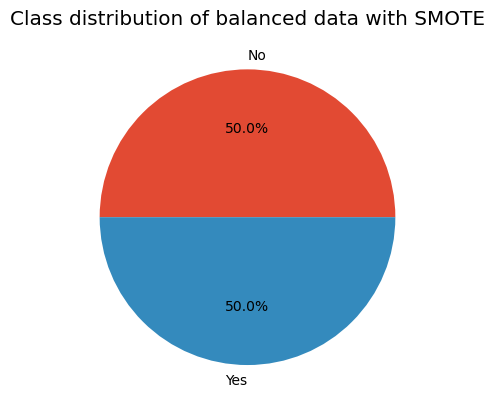

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Count the occurrences of each class in the y_resampled array
class_counts = np.bincount(y_resampled)

# Get the class labels and their corresponding counts
labels = np.unique(y_resampled)
counts = class_counts[labels]

# Set custom class names
class_names = ['No', 'Yes']

# Create a pie chart
plt.pie(counts, labels=class_names, autopct='%1.1f%%')

# Set the title of the pie chart
plt.title('Class distribution of balanced data with SMOTE')

# Display the pie chart
plt.show()

In [103]:
from sklearn.model_selection import train_test_split
import numpy as np

def split_train_valid_test(X, y, test_size=0.2, random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=test_size/(1-test_size), random_state=random_state, stratify=y_train)
    return X_train, X_valid, X_test, y_train, y_valid, y_test

# Usage example
X_train_resampled, X_valid_resampled, X_test_resampled, y_train_resampled, y_valid_resampled, y_test_resampled = split_train_valid_test(X_resampled, y_resampled, test_size=0.3, random_state=42)
_, train_counts = np.unique(y_train_resampled, return_counts=True)
_, valid_counts = np.unique(y_valid_resampled, return_counts=True)
_, test_counts = np.unique(y_test_resampled, return_counts=True)
print("[train] # class 0: {} | # class 1: {}".format(train_counts[0], train_counts[1]))
print("[valid] # class 0: {} | # class 1: {}".format(valid_counts[0], valid_counts[1]))
print("[test]  # class 0: {} | # class 1: {}".format(test_counts[0], test_counts[1]))

[train] # class 0: 37929 | # class 1: 37929
[valid] # class 0: 28447 | # class 1: 28448
[test]  # class 0: 28448 | # class 1: 28447


In [104]:
# Scaling code
scaler = StandardScaler()
scaler = scaler.fit(X_train_resampled)

X_train_resampled_std = scaler.transform(X_train_resampled)
X_valid_resampled_std = scaler.transform(X_valid_resampled)
X_test_resampled_std = scaler.transform(X_test_resampled)

In [105]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [106]:
def calc_sens_spec(y_true,y_pred):
    conf_matrix = confusion_matrix(y_true,y_pred)
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    # calculate the sensitivity
    sensitivity = TP / (TP + FN)    
    # calculate the specificity
    specificity = TN / (TN + FP)
    return sensitivity,specificity
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold

In [107]:
import time as timer
## SVM
start = timer.time()
svm_model = SVC(kernel='rbf',probability=True)
svm_model.fit(X_train_resampled_std, y_train_resampled)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_svm = svm_model.predict(X_test_resampled_std)
y_svm_prob = svm_model.predict_proba(X_test_resampled_std)

Finished training within 5287.83 seconds


In [108]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

Classification report for SVM:
              precision    recall  f1-score   support

           0       0.63      0.69      0.66     28448
           1       0.66      0.59      0.62     28447

    accuracy                           0.64     56895
   macro avg       0.64      0.64      0.64     56895
weighted avg       0.64      0.64      0.64     56895

Confusion matrix for SVM:
[[19750  8698]
 [11590 16857]]
Accuracy score for SVM: 0.64
Precision score for SVM: 0.66
Recall score for SVM: 0.59
F1 score for SVM: 0.62
Sensitivity score for SVM: 0.59
Specificity score for SVM: 0.69
AUC score for SVM: 0.70


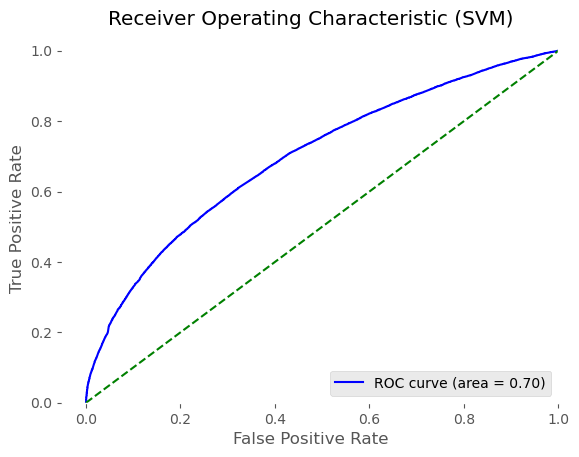

In [109]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have the necessary data and have imported the required libraries

# Print classification report
print("Classification report for SVM:\n{}".format(classification_report(y_test_resampled, y_svm)))

# Print confusion matrix
print("Confusion matrix for SVM:\n{}".format(confusion_matrix(y_test_resampled, y_svm)))

# Calculate and print accuracy score
accuracy_score_svm = accuracy_score(y_test_resampled, y_svm)
print("Accuracy score for SVM: {:.2f}".format(accuracy_score_svm))

# Calculate precision, recall, and f1 scores
prec_svm = precision_score(y_test_resampled, y_svm)
rec_svm = recall_score(y_test_resampled, y_svm)
f1_svm = f1_score(y_test_resampled, y_svm)
print("Precision score for SVM: {:.2f}".format(prec_svm))
print("Recall score for SVM: {:.2f}".format(rec_svm))
print("F1 score for SVM: {:.2f}".format(f1_svm))

# Calculate sensitivity, specificity, and AUC
sens_svm, spec_svm = calc_sens_spec(y_test_resampled, y_svm)
fpr, tpr, _ = roc_curve(y_test_resampled, y_svm_prob[:, 1])
auc_svm = roc_auc_score(y_test_resampled, y_svm_prob[:, 1])
print("Sensitivity score for SVM: {:.2f}".format(sens_svm))
print("Specificity score for SVM: {:.2f}".format(spec_svm))
print("AUC score for SVM: {:.2f}".format(auc_svm))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_svm)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (SVM)')
ax.legend(loc="lower right")
ax = plt.gca()
ax.set_facecolor("white")
plt.show()

In [113]:
##Logistic Regression (LR)
start = timer.time()
logit_model = LogisticRegression(solver='lbfgs', random_state=42)
logit_model.fit(X_train_resampled_std, y_train_resampled)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_logit = logit_model.predict(X_test_resampled_std)
y_logit_prob = logit_model.predict_proba(X_test_resampled_std)

Finished training within 0.36 seconds


Classification report for LR:
              precision    recall  f1-score   support

           0       0.60      0.65      0.62     28448
           1       0.62      0.57      0.59     28447

    accuracy                           0.61     56895
   macro avg       0.61      0.61      0.61     56895
weighted avg       0.61      0.61      0.61     56895

Confusion matrix for LR:
[[18354 10094]
 [12131 16316]]
Accuracy score for LR: 0.61
Precision score for LR: 0.62
Recall score for LR: 0.57
F1 score for LR: 0.59
Sensitivity score for LR: 0.57
Specificity score for LR: 0.65
AUC score for LR: 0.65


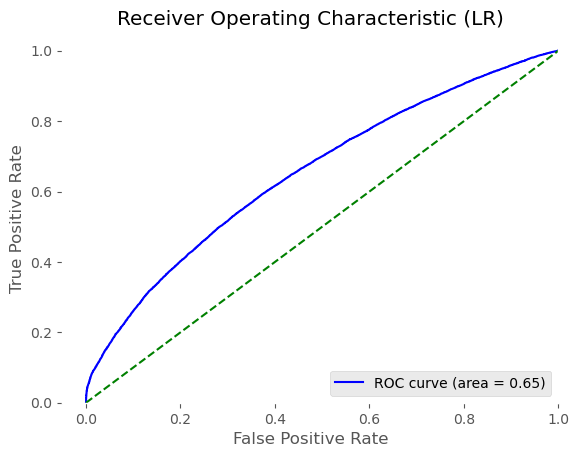

In [114]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have the necessary data and have imported the required libraries

# Print classification report
print("Classification report for LR:\n{}".format(classification_report(y_test_resampled, y_logit)))

# Print confusion matrix
print("Confusion matrix for LR:\n{}".format(confusion_matrix(y_test_resampled, y_logit)))

# Calculate and print accuracy score
accuracy_score_lr = accuracy_score(y_test_resampled, y_logit)
print("Accuracy score for LR: {:.2f}".format(accuracy_score_lr))

# Calculate precision, recall, and f1 scores
prec_lr = precision_score(y_test_resampled, y_logit)
rec_lr = recall_score(y_test_resampled, y_logit)
f1_lr = f1_score(y_test_resampled, y_logit)
print("Precision score for LR: {:.2f}".format(prec_lr))
print("Recall score for LR: {:.2f}".format(rec_lr))
print("F1 score for LR: {:.2f}".format(f1_lr))

# Calculate sensitivity, specificity, and AUC
sens_lr, spec_lr = calc_sens_spec(y_test_resampled, y_logit)
fpr, tpr, _ = roc_curve(y_test_resampled, y_logit_prob[:, 1])
auc_lr = roc_auc_score(y_test_resampled, y_logit_prob[:, 1])
print("Sensitivity score for LR: {:.2f}".format(sens_lr))
print("Specificity score for LR: {:.2f}".format(spec_lr))
print("AUC score for LR: {:.2f}".format(auc_lr))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_lr)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (LR)')
ax.legend(loc="lower right")
ax = plt.gca()
ax.set_facecolor("white")
plt.show()

In [115]:
## Gaussian Naive Bayes (GNB)
start = timer.time()
gnb_model = GaussianNB()
gnb_model.fit(X_train_resampled_std, y_train_resampled)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_gnb = gnb_model.predict(X_test_resampled_std)
y_gnb_prob = gnb_model.predict_proba(X_test_resampled_std)

Finished training within 0.08 seconds


Classification report for GNB:
              precision    recall  f1-score   support

           0       0.57      0.74      0.65     28448
           1       0.63      0.45      0.53     28447

    accuracy                           0.59     56895
   macro avg       0.60      0.59      0.59     56895
weighted avg       0.60      0.59      0.59     56895

Confusion matrix for GNB:
[[21008  7440]
 [15638 12809]]
Accuracy score for GNB: 0.59
Precision score for GNB: 0.63
Recall score for GNB: 0.45
F1 score for GNB: 0.53
Sensitivity score for GNB: 0.45
Specificity score for GNB: 0.74
AUC score for GNB: 0.64


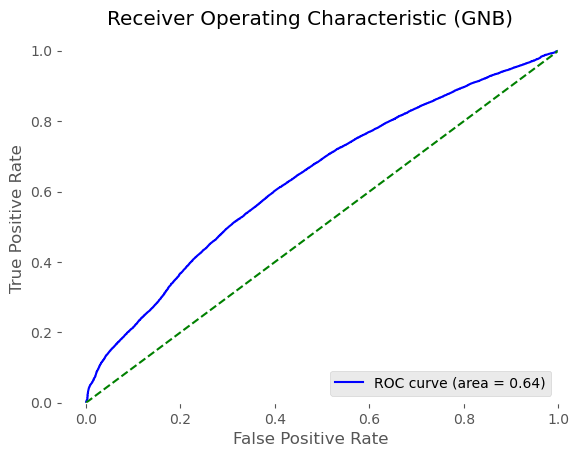

In [116]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have the necessary data and have imported the required libraries

# Print classification report
print("Classification report for GNB:\n{}".format(classification_report(y_test_resampled, y_gnb)))

# Print confusion matrix
print("Confusion matrix for GNB:\n{}".format(confusion_matrix(y_test_resampled, y_gnb)))

# Calculate and print accuracy score
accuracy_score_gnb = accuracy_score(y_test_resampled, y_gnb)
print("Accuracy score for GNB: {:.2f}".format(accuracy_score_gnb))

# Calculate precision, recall, and f1 scores
prec_gnb = precision_score(y_test_resampled, y_gnb)
rec_gnb = recall_score(y_test_resampled, y_gnb)
f1_gnb = f1_score(y_test_resampled, y_gnb)
print("Precision score for GNB: {:.2f}".format(prec_gnb))
print("Recall score for GNB: {:.2f}".format(rec_gnb))
print("F1 score for GNB: {:.2f}".format(f1_gnb))

# Calculate sensitivity, specificity, and AUC
sens_gnb, spec_gnb = calc_sens_spec(y_test_resampled, y_gnb)
fpr, tpr, _ = roc_curve(y_test_resampled, y_gnb_prob[:, 1])
auc_gnb = roc_auc_score(y_test_resampled, y_gnb_prob[:, 1])
print("Sensitivity score for GNB: {:.2f}".format(sens_gnb))
print("Specificity score for GNB: {:.2f}".format(spec_gnb))
print("AUC score for GNB: {:.2f}".format(auc_gnb))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_gnb)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (GNB)')
ax.legend(loc="lower right")
ax = plt.gca()
ax.set_facecolor("white")
plt.show()

In [117]:
from sklearn.tree import DecisionTreeClassifier
##  DT
start = timer.time()
dtree_model = DecisionTreeClassifier(random_state=42)
dtree_model.fit(X_train_resampled_std, y_train_resampled)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_dtree = dtree_model.predict(X_test_resampled_std)
y_dtree_prob = dtree_model.predict_proba(X_test_resampled_std)

Finished training within 1.28 seconds


Classification report for DT:
              precision    recall  f1-score   support

           0       0.67      0.64      0.65     28448
           1       0.65      0.68      0.67     28447

    accuracy                           0.66     56895
   macro avg       0.66      0.66      0.66     56895
weighted avg       0.66      0.66      0.66     56895

Confusion matrix for DT:
[[18107 10341]
 [ 9084 19363]]
Accuracy score for DT: 0.66
Precision score for DT: 0.65
Recall score for DT: 0.68
F1 score for DT: 0.67
Sensitivity score for DT: 0.68
Specificity score for DT: 0.64
AUC score for DT: 0.66


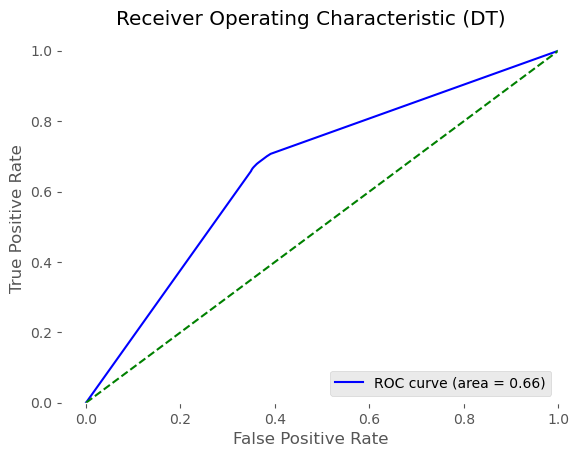

In [118]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have the necessary data and have imported the required libraries

# Print classification report
print("Classification report for DT:\n{}".format(classification_report(y_test_resampled, y_dtree)))

# Print confusion matrix
print("Confusion matrix for DT:\n{}".format(confusion_matrix(y_test_resampled, y_dtree)))

# Calculate and print accuracy score
accuracy_score_dtree = accuracy_score(y_test_resampled, y_dtree)
print("Accuracy score for DT: {:.2f}".format(accuracy_score_dtree))

# Calculate precision, recall, and f1 scores
prec_dtree = precision_score(y_test_resampled, y_dtree)
rec_dtree = recall_score(y_test_resampled, y_dtree)
f1_dtree = f1_score(y_test_resampled, y_dtree)
print("Precision score for DT: {:.2f}".format(prec_dtree))
print("Recall score for DT: {:.2f}".format(rec_dtree))
print("F1 score for DT: {:.2f}".format(f1_dtree))

# Calculate sensitivity, specificity, and AUC
sens_dtree, spec_dtree = calc_sens_spec(y_test_resampled, y_dtree)
fpr, tpr, _ = roc_curve(y_test_resampled, y_dtree_prob[:, 1])
auc_dtree = roc_auc_score(y_test_resampled, y_dtree_prob[:, 1])
print("Sensitivity score for DT: {:.2f}".format(sens_dtree))
print("Specificity score for DT: {:.2f}".format(spec_dtree))
print("AUC score for DT: {:.2f}".format(auc_dtree))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_dtree)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (DT)')
ax.legend(loc="lower right")
ax = plt.gca()
ax.set_facecolor("white")
plt.show()

In [119]:
## RF
start = timer.time()
ranfor_model = RandomForestClassifier(n_estimators=100, random_state=42)
ranfor_model.fit(X_train_resampled_std, y_train_resampled)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_ranfor = ranfor_model.predict(X_test_resampled_std)
y_ranfor_prob = ranfor_model.predict_proba(X_test_resampled_std)

Finished training within 15.32 seconds


Classification report for RF:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72     28448
           1       0.72      0.70      0.71     28447

    accuracy                           0.72     56895
   macro avg       0.72      0.72      0.72     56895
weighted avg       0.72      0.72      0.72     56895

Confusion matrix for RF:
[[20726  7722]
 [ 8433 20014]]
Accuracy score for RF: 0.72
Precision score for RF: 0.72
Recall score for RF: 0.70
F1 score for RF: 0.71
Sensitivity score for RF: 0.70
Specificity score for RF: 0.73
AUC score for RF: 0.79


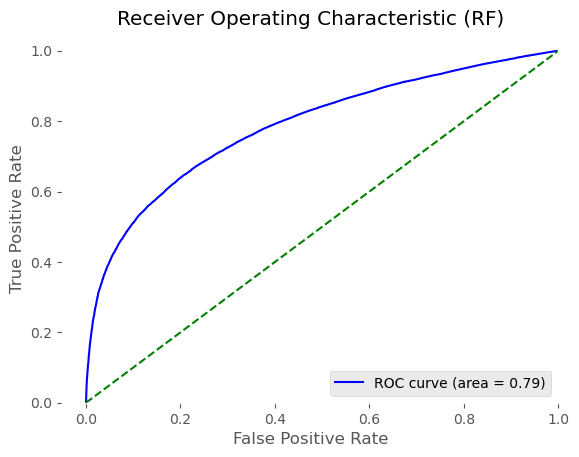

In [120]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have the necessary data and have imported the required libraries

# Print classification report
print("Classification report for RF:\n{}".format(classification_report(y_test_resampled, y_ranfor)))

# Print confusion matrix
print("Confusion matrix for RF:\n{}".format(confusion_matrix(y_test_resampled, y_ranfor)))

# Calculate and print accuracy score
accuracy_score_ranfor = accuracy_score(y_test_resampled, y_ranfor)
print("Accuracy score for RF: {:.2f}".format(accuracy_score_ranfor))

# Calculate precision, recall, and f1 scores
prec_ranfor = precision_score(y_test_resampled, y_ranfor)
rec_ranfor = recall_score(y_test_resampled, y_ranfor)
f1_ranfor = f1_score(y_test_resampled, y_ranfor)
print("Precision score for RF: {:.2f}".format(prec_ranfor))
print("Recall score for RF: {:.2f}".format(rec_ranfor))
print("F1 score for RF: {:.2f}".format(f1_ranfor))

# Calculate sensitivity, specificity, and AUC
sens_ranfor, spec_ranfor = calc_sens_spec(y_test_resampled, y_ranfor)
fpr, tpr, _ = roc_curve(y_test_resampled, y_ranfor_prob[:, 1])
auc_ranfor = roc_auc_score(y_test_resampled, y_ranfor_prob[:, 1])
print("Sensitivity score for RF: {:.2f}".format(sens_ranfor))
print("Specificity score for RF: {:.2f}".format(spec_ranfor))
print("AUC score for RF: {:.2f}".format(auc_ranfor))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_ranfor)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (RF)')
ax.legend(loc="lower right")
ax = plt.gca()
ax.set_facecolor("white")
plt.show()

In [121]:
start = timer.time()
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train_resampled_std, y_train_resampled)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_xgb = xgb_model.predict(X_test_resampled_std)
y_xgb_prob = xgb_model.predict_proba(X_test_resampled_std)

Finished training within 1.57 seconds


Classification report for XGB: 
              precision    recall  f1-score   support

           0       0.66      0.72      0.68     28448
           1       0.69      0.62      0.65     28447

    accuracy                           0.67     56895
   macro avg       0.67      0.67      0.67     56895
weighted avg       0.67      0.67      0.67     56895

Confusion matrix for XGB: 
[[20390  8058]
 [10703 17744]]
Accuracy score for xgb: 0.67
Precision score for XGB: 0.69
Recall score for XGB: 0.62
F1 score for XGB: 0.65
Sensitivity score for XGB: 0.62
Specitivity score for XGB: 0.72
AUC score for XGB: 0.74


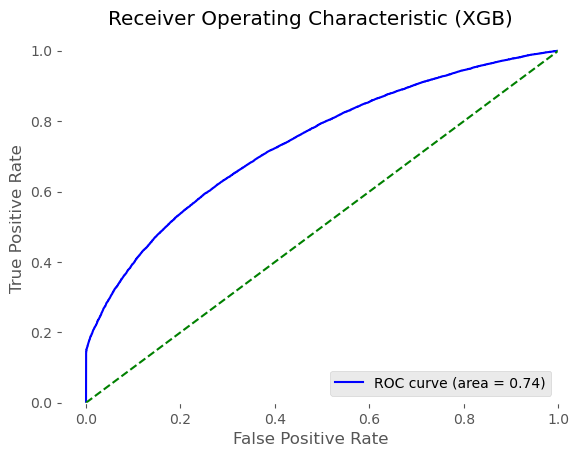

In [122]:
print("Classification report for XGB: \n{}".format(classification_report(y_test_resampled,y_xgb)))
print("Confusion matrix for XGB: \n{}".format(confusion_matrix(y_test_resampled,y_xgb)))
# Calculate and print accuracy score
accuracy_score_xgb = accuracy_score(y_test_resampled, y_xgb)
print("Accuracy score for xgb: {:.2f}".format(accuracy_score_xgb))
# calculate precision, recall, and f1 scores
prec_xgb = precision_score(y_test_resampled,y_xgb)
rec_xgb = recall_score(y_test_resampled,y_xgb)
f1_xgb = f1_score(y_test_resampled,y_xgb)
print("Precision score for XGB: {:.2f}".format(prec_xgb))
print("Recall score for XGB: {:.2f}".format(rec_xgb))
print("F1 score for XGB: {:.2f}".format(f1_xgb))
# calculate sensitivity, specificity, and auc
sens_xgb,spec_xgb = calc_sens_spec(y_test_resampled,y_xgb)
fpr, tpr, _ = roc_curve(y_test_resampled, y_xgb_prob[:,1])
auc_xgb = roc_auc_score(y_test_resampled, y_xgb_prob[:,1])
print("Sensitivity score for XGB: {:.2f}".format(sens_xgb))
print("Specitivity score for XGB: {:.2f}".format(spec_xgb))
print("AUC score for XGB: {:.2f}".format(auc_xgb))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_xgb)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (XGB)')
ax.legend(loc="lower right")
ax= plt.gca()
ax.set_facecolor("white")
plt.show()

In [123]:
from sklearn.neighbors import KNeighborsClassifier
## KNN
start = timer.time()
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train_resampled_std, y_train_resampled)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_knn = knn_model.predict(X_test_resampled_std)
y_knn_prob = knn_model.predict_proba(X_test_resampled_std)

Finished training within 0.02 seconds


Classification report for knn: 
              precision    recall  f1-score   support

           0       0.63      0.60      0.62     28448
           1       0.62      0.64      0.63     28447

    accuracy                           0.62     56895
   macro avg       0.62      0.62      0.62     56895
weighted avg       0.62      0.62      0.62     56895

Confusion matrix for knn: 
[[17208 11240]
 [10206 18241]]
Accuracy score for knn: 0.62
Precision score for knn: 0.62
Recall score for knn: 0.64
F1 score for knn: 0.63
Sensitivity score for knn: 0.64
Specitivity score for knn: 0.60
AUC score for knn: 0.67


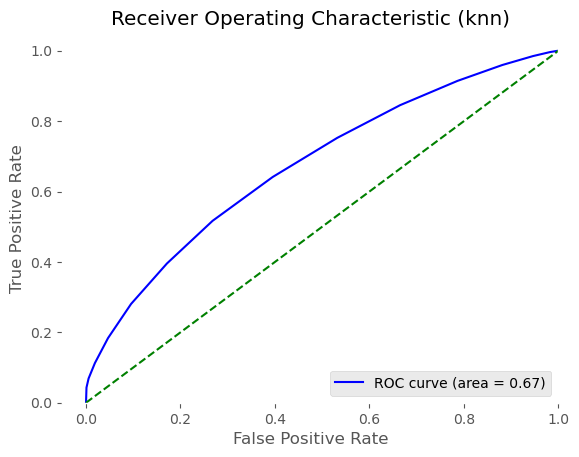

In [124]:
print("Classification report for knn: \n{}".format(classification_report(y_test_resampled,y_knn)))
print("Confusion matrix for knn: \n{}".format(confusion_matrix(y_test_resampled,y_knn)))
# Calculate and print accuracy score
accuracy_score_knn = accuracy_score(y_test_resampled, y_knn)
print("Accuracy score for knn: {:.2f}".format(accuracy_score_knn))
# calculate precision, recall, and f1 scores
prec_knn = precision_score(y_test_resampled,y_knn)
rec_knn = recall_score(y_test_resampled,y_knn)
f1_knn = f1_score(y_test_resampled,y_knn)
print("Precision score for knn: {:.2f}".format(prec_knn))
print("Recall score for knn: {:.2f}".format(rec_knn))
print("F1 score for knn: {:.2f}".format(f1_knn))
# calculate sensitivity, specificity, and auc
sens_knn,spec_knn = calc_sens_spec(y_test_resampled,y_knn)
fpr, tpr, _ = roc_curve(y_test_resampled,  y_knn_prob[:,1])
auc_knn = roc_auc_score(y_test_resampled, y_knn_prob[:,1])
print("Sensitivity score for knn: {:.2f}".format(sens_knn))
print("Specitivity score for knn: {:.2f}".format(spec_knn))
print("AUC score for knn: {:.2f}".format(auc_knn))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_knn)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (knn)')
ax.legend(loc="lower right")
ax= plt.gca()
ax.set_facecolor("white")
plt.show()

In [125]:
from sklearn.ensemble import AdaBoostClassifier
import time

# Create an instance of the AdaBoostClassifier model
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Start the timer to measure the training time
start = time.time()

# Fit the AdaBoost model to the training data
adaboost_model.fit(X_train_resampled_std, y_train_resampled)

# Stop the timer and calculate the training time
end = time.time()
print("Finished training within {:.2f} seconds".format(end - start))

# Predict the labels for the test set using the trained AdaBoost model
y_adaboost = adaboost_model.predict(X_test_resampled_std)

# Predict the class probabilities for the test set using the trained AdaBoost model
y_adaboost_prob = adaboost_model.predict_proba(X_test_resampled_std)

Finished training within 3.78 seconds


Classification report for AdaBoost:
              precision    recall  f1-score   support

           0       0.64      0.66      0.65     28448
           1       0.65      0.62      0.63     28447

    accuracy                           0.64     56895
   macro avg       0.64      0.64      0.64     56895
weighted avg       0.64      0.64      0.64     56895

Confusion matrix for AdaBoost:
[[18896  9552]
 [10816 17631]]
Accuracy score for AdaBoost: 0.64
Precision score for AdaBoost: 0.65
Recall score for AdaBoost: 0.62
F1 score for AdaBoost: 0.63
Sensitivity score for AdaBoost: 0.62
Specificity score for AdaBoost: 0.66
AUC score for AdaBoost: 0.70


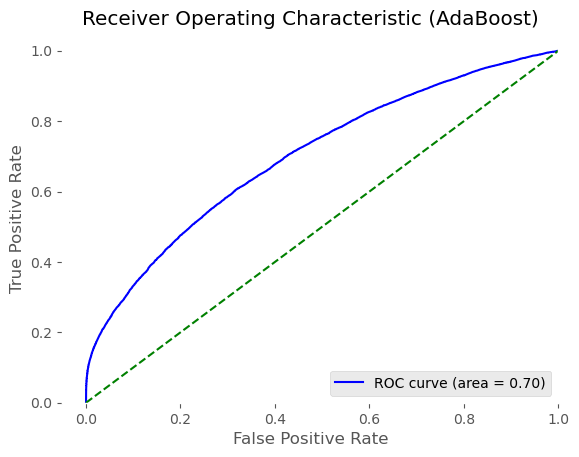

In [126]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Classification report
print("Classification report for AdaBoost:\n{}".format(classification_report(y_test_resampled, y_adaboost)))

# Confusion matrix
print("Confusion matrix for AdaBoost:\n{}".format(confusion_matrix(y_test_resampled, y_adaboost)))

# Calculate and print accuracy score
accuracy_score_adaboost = accuracy_score(y_test_resampled, y_adaboost)
print("Accuracy score for AdaBoost: {:.2f}".format(accuracy_score_adaboost))

# Precision, recall, and F1 scores
prec_adaboost = precision_score(y_test_resampled, y_adaboost)
rec_adaboost = recall_score(y_test_resampled, y_adaboost)
f1_adaboost = f1_score(y_test_resampled, y_adaboost)
print("Precision score for AdaBoost: {:.2f}".format(prec_adaboost))
print("Recall score for AdaBoost: {:.2f}".format(rec_adaboost))
print("F1 score for AdaBoost: {:.2f}".format(f1_adaboost))

# Calculate sensitivity, specificity, and AUC
def calc_sens_spec(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

sens_adaboost, spec_adaboost = calc_sens_spec(y_test_resampled, y_adaboost)
print("Sensitivity score for AdaBoost: {:.2f}".format(sens_adaboost))
print("Specificity score for AdaBoost: {:.2f}".format(spec_adaboost))

# Calculate the false positive rate, true positive rate, and AUC
fpr, tpr, _ = roc_curve(y_test_resampled, y_adaboost_prob[:, 1])
auc_adaboost = roc_auc_score(y_test_resampled, y_adaboost_prob[:, 1])
print("AUC score for AdaBoost: {:.2f}".format(auc_adaboost))

# Plot the ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_adaboost)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (AdaBoost)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [127]:
from catboost import CatBoostClassifier
import time

# CatBoost
start = time.time()
catboost_model = CatBoostClassifier(iterations=100, random_state=42)
catboost_model.fit(X_train_resampled_std, y_train_resampled)
end = time.time()
print("Finished training within {:.2f} seconds".format(end - start))

# Predicting the test set results
y_catboost = catboost_model.predict(X_test_resampled_std)
y_catboost_prob = catboost_model.predict_proba(X_test_resampled_std)

Learning rate set to 0.5
0:	learn: 0.6479299	total: 170ms	remaining: 16.8s
1:	learn: 0.6327808	total: 194ms	remaining: 9.51s
2:	learn: 0.6252904	total: 227ms	remaining: 7.35s
3:	learn: 0.6215642	total: 271ms	remaining: 6.5s
4:	learn: 0.6109879	total: 302ms	remaining: 5.74s
5:	learn: 0.6077833	total: 328ms	remaining: 5.14s
6:	learn: 0.6050734	total: 354ms	remaining: 4.7s
7:	learn: 0.6017236	total: 384ms	remaining: 4.42s
8:	learn: 0.5997754	total: 414ms	remaining: 4.18s
9:	learn: 0.5983111	total: 451ms	remaining: 4.06s
10:	learn: 0.5969360	total: 471ms	remaining: 3.81s
11:	learn: 0.5950145	total: 490ms	remaining: 3.59s
12:	learn: 0.5941255	total: 510ms	remaining: 3.41s
13:	learn: 0.5929134	total: 528ms	remaining: 3.25s
14:	learn: 0.5921712	total: 551ms	remaining: 3.12s
15:	learn: 0.5915756	total: 570ms	remaining: 2.99s
16:	learn: 0.5904253	total: 593ms	remaining: 2.89s
17:	learn: 0.5896218	total: 611ms	remaining: 2.78s
18:	learn: 0.5885947	total: 635ms	remaining: 2.71s
19:	learn: 0.58793

Learning rate set to 0.065418
0:	learn: 0.6823852	total: 32.2ms	remaining: 32.1s
1:	learn: 0.6732970	total: 65ms	remaining: 32.4s
2:	learn: 0.6693196	total: 90.3ms	remaining: 30s
3:	learn: 0.6628221	total: 113ms	remaining: 28.2s
4:	learn: 0.6592678	total: 138ms	remaining: 27.5s
5:	learn: 0.6569964	total: 162ms	remaining: 26.8s
6:	learn: 0.6545443	total: 185ms	remaining: 26.2s
7:	learn: 0.6529670	total: 211ms	remaining: 26.2s
8:	learn: 0.6493607	total: 243ms	remaining: 26.7s
9:	learn: 0.6456087	total: 294ms	remaining: 29.1s
10:	learn: 0.6442354	total: 352ms	remaining: 31.6s
11:	learn: 0.6413681	total: 504ms	remaining: 41.5s
12:	learn: 0.6400257	total: 563ms	remaining: 42.7s
13:	learn: 0.6387662	total: 591ms	remaining: 41.6s
14:	learn: 0.6378524	total: 618ms	remaining: 40.6s
15:	learn: 0.6368180	total: 652ms	remaining: 40.1s
16:	learn: 0.6359333	total: 678ms	remaining: 39.2s
17:	learn: 0.6334886	total: 704ms	remaining: 38.4s
18:	learn: 0.6327155	total: 732ms	remaining: 37.8s
19:	learn: 0

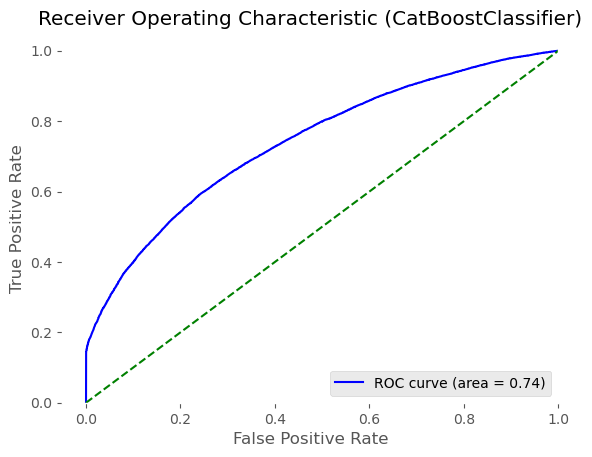

In [131]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create and train the CatBoostClassifier model
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_catboost = catboost_model.predict(X_test_resampled)

# Classification report
print("Classification report for CatBoostClassifier:\n{}".format(classification_report(y_test_resampled, y_catboost)))

# Confusion matrix
print("Confusion matrix for CatBoostClassifier:\n{}".format(confusion_matrix(y_test_resampled, y_catboost)))

# Calculate and print accuracy score
accuracy_score_catboost = accuracy_score(y_test_resampled, y_catboost)
print("Accuracy score for CatBoost: {:.2f}".format(accuracy_score_catboost))

# Precision, recall, and F1 scores
prec_catboost = precision_score(y_test_resampled, y_catboost)
rec_catboost = recall_score(y_test_resampled, y_catboost)
f1_catboost = f1_score(y_test_resampled, y_catboost)
print("Precision score for CatBoostClassifier: {:.2f}".format(prec_catboost))
print("Recall score for CatBoostClassifier: {:.2f}".format(rec_catboost))
print("F1 score for CatBoostClassifier: {:.2f}".format(f1_catboost))

# Calculate sensitivity, specificity, and AUC
def calc_sens_spec(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

sens_catboost, spec_catboost = calc_sens_spec(y_test_resampled, y_catboost)
print("Sensitivity score for CatBoostClassifier: {:.2f}".format(sens_catboost))
print("Specificity score for CatBoostClassifier: {:.2f}".format(spec_catboost))

# Calculate the false positive rate, true positive rate, and AUC
y_catboost_prob = catboost_model.predict_proba(X_test_resampled)[:, 1]
fpr, tpr, _ = roc_curve(y_test_resampled, y_catboost_prob)
auc_catboost = roc_auc_score(y_test_resampled, y_catboost_prob)
print("AUC score for CatBoostClassifier: {:.2f}".format(auc_catboost))

# Plot the ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_catboost)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (CatBoostClassifier)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [143]:
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create the FNN model
fnn_model = Sequential()
fnn_model.add(Dense(100, activation='relu', input_dim=X_train_resampled_std.shape[1]))
fnn_model.add(Dense(50, activation='relu'))
fnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
fnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
start = time.time()
fnn_model.fit(X_train_resampled_std, y_train_resampled, epochs=10, batch_size=32)
end = time.time()
print("Finished training within {:.2f} seconds".format(end - start))

# Predicting the test set results
y_ffn_prob = fnn_model.predict(X_test_resampled_std)
y_ffn = np.round(y_ffn_prob).astype(int)

Epoch 1/10
2371/2371 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.6051 - loss: 0.6536
Epoch 2/10
2371/2371 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6387 - loss: 0.6284
Epoch 3/10
2371/2371 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.6457 - loss: 0.6195
Epoch 4/10
2371/2371 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6532 - loss: 0.6124
Epoch 5/10
2371/2371 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6523 - loss: 0.6097
Epoch 6/10
2371/2371 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6620 - loss: 0.6041
Epoch 7/10
2371/2371 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6643 - loss: 0.6001
Epoch 8/10
2371/2371 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6667 - loss: 0.5976
Epoch 9/10
2371/2371 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6697 - loss: 0.5926
Epoch 10/10
2371/2371 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6707 - loss: 0.5908
Finished training within 57.02 seconds
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


1778/1778 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Classification report for FNN:
              precision    recall  f1-score   support

           0       0.63      0.70      0.66     28448
           1       0.66      0.58      0.62     28447

    accuracy                           0.64     56895
   macro avg       0.64      0.64      0.64     56895
weighted avg       0.64      0.64      0.64     56895

Confusion matrix for FNN:
[[19990  8458]
 [11876 16571]]
Accuracy score for FNN: 0.64
Precision score for FNN: 0.66
Recall score for FNN: 0.58
F1 score for FNN: 0.62
Sensitivity score for FNN: 0.58
Specificity score for FNN: 0.70
AUC score for FNN: 0.70


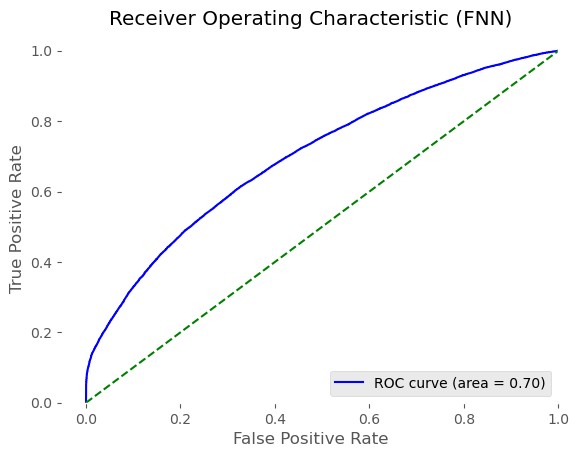

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

# Predicting the test set results
y_ffn_prob = fnn_model.predict(X_test_resampled_std)
y_ffn = np.round(y_ffn_prob).astype(int)

# Classification report
print("Classification report for FNN:\n{}".format(classification_report(y_test_resampled, y_ffn)))

# Confusion matrix
print("Confusion matrix for FNN:\n{}".format(confusion_matrix(y_test_resampled, y_ffn)))

# Calculate and print accuracy score
accuracy_score_ffn = accuracy_score(y_test_resampled, y_ffn)
print("Accuracy score for FNN: {:.2f}".format(accuracy_score_ffn))

# Precision, recall, and F1 scores
prec_ffn = precision_score(y_test_resampled, y_ffn)
rec_ffn = recall_score(y_test_resampled, y_ffn)
f1_ffn = f1_score(y_test_resampled, y_ffn)
print("Precision score for FNN: {:.2f}".format(prec_ffn))
print("Recall score for FNN: {:.2f}".format(rec_ffn))
print("F1 score for FNN: {:.2f}".format(f1_ffn))

# Calculate sensitivity, specificity, and AUC
def calc_sens_spec(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

sens_ffn, spec_ffn = calc_sens_spec(y_test_resampled, y_ffn)
print("Sensitivity score for FNN: {:.2f}".format(sens_ffn))
print("Specificity score for FNN: {:.2f}".format(spec_ffn))

# Calculate the false positive rate, true positive rate, and AUC
fpr, tpr, _ = roc_curve(y_test_resampled, y_ffn_prob)
auc_ffn = roc_auc_score(y_test_resampled, y_ffn_prob)
print("AUC score for FNN: {:.2f}".format(auc_ffn))

# Plot the ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_ffn)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (FNN)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

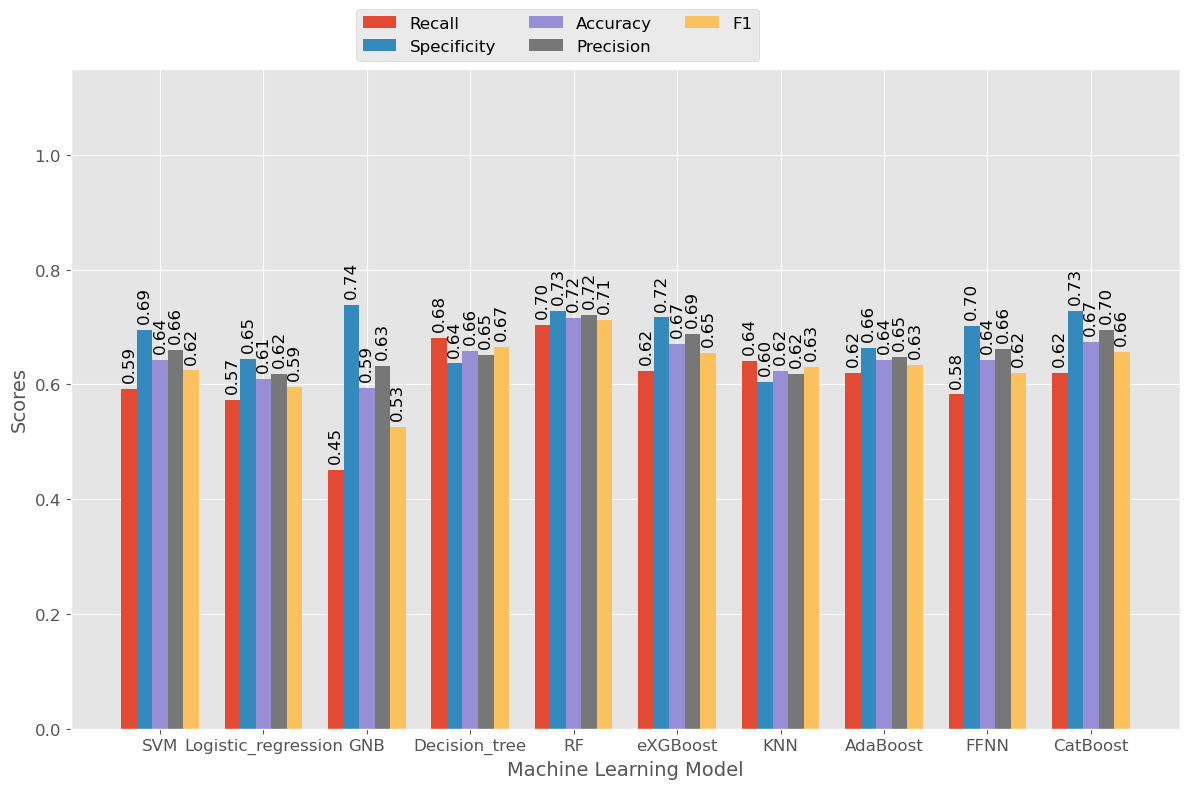

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

ml_names = ['SVM', 'Logistic_regression', 'GNB', 'Decision_tree', 'RF', 'eXGBoost', 'KNN', 'AdaBoost', 'FFNN', 'CatBoost']
recall_all = [rec_svm, rec_lr, rec_gnb, rec_dtree, rec_ranfor, rec_xgb, rec_knn, rec_adaboost, rec_ffn, rec_catboost]
spec_all = [spec_svm, spec_lr, spec_gnb, spec_dtree, spec_ranfor, spec_xgb, spec_knn, spec_adaboost, spec_ffn, spec_catboost]
prec_all = [prec_svm, prec_lr, prec_gnb, prec_dtree, prec_ranfor, prec_xgb, prec_knn, prec_adaboost, prec_ffn, prec_catboost]
f1_all = [f1_svm, f1_lr, f1_gnb, f1_dtree, f1_ranfor, f1_xgb, f1_knn, f1_adaboost, f1_ffn, f1_catboost]
accuracy_all = [accuracy_score_svm, accuracy_score_lr, accuracy_score_gnb, accuracy_score_dtree, accuracy_score_ranfor, accuracy_score_xgb, accuracy_score_knn, accuracy_score_adaboost, accuracy_score_ffn, accuracy_score_catboost]

def autolabel(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=12,
                    rotation=90,
                    ha='center', va='bottom')

width = 0.15  # the width of the bars
r = np.arange(len(ml_names))  # the label locations

# Plot recall, specificity, accuracy, precision, and F1 score
fig, ax = plt.subplots(figsize=(12, 8))

bar1 = ax.bar(r - 2 * width, recall_all, width, label='Recall')
bar2 = ax.bar(r - width, spec_all, width, label='Specificity')
bar3 = ax.bar(r, accuracy_all, width, label='Accuracy')
bar4 = ax.bar(r + width, prec_all, width, label='Precision')
bar5 = ax.bar(r + 2 * width, f1_all, width, label='F1')

ax.set_ylim([0, 1.15])
ax.set_ylabel('Scores', fontsize=14)
ax.set_xticks(r)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model", fontsize=14)
ax.legend(loc='lower left', ncol=3, bbox_to_anchor=(0.25, 1), fontsize=12)

autolabel(ax, bar1)
autolabel(ax, bar2)
autolabel(ax, bar3)
autolabel(ax, bar4)
autolabel(ax, bar5)

fig.tight_layout()
fig.savefig("ml_benchmark_scores.pdf", bbox_inches='tight')
plt.show()

1778/1778 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Learning rate set to 0.065418
0:	learn: 0.6823852	total: 47.9ms	remaining: 47.8s
1:	learn: 0.6732970	total: 65.4ms	remaining: 32.6s
2:	learn: 0.6693196	total: 83.7ms	remaining: 27.8s
3:	learn: 0.6628221	total: 101ms	remaining: 25.2s
4:	learn: 0.6592678	total: 120ms	remaining: 23.8s
5:	learn: 0.6569964	total: 137ms	remaining: 22.7s
6:	learn: 0.6545443	total: 155ms	remaining: 22s
7:	learn: 0.6529670	total: 174ms	remaining: 21.6s
8:	learn: 0.6493607	total: 198ms	remaining: 21.8s
9:	learn: 0.6456087	total: 217ms	remaining: 21.4s
10:	learn: 0.6442354	total: 236ms	remaining: 21.2s
11:	learn: 0.6413681	total: 254ms	remaining: 20.9s
12:	learn: 0.6400257	total: 273ms	remaining: 20.7s
13:	learn: 0.6387662	total: 291ms	remaining: 20.5s
14:	learn: 0.6378524	total: 310ms	remaining: 20.3s
15:	learn: 0.6368180	total: 327ms	remaining: 20.1s
16:	learn: 0.6359333	total: 346ms	remaining: 20s
17:	learn: 0.6334886	total: 367ms	remaining: 20s
18:	learn: 0.6327155	t

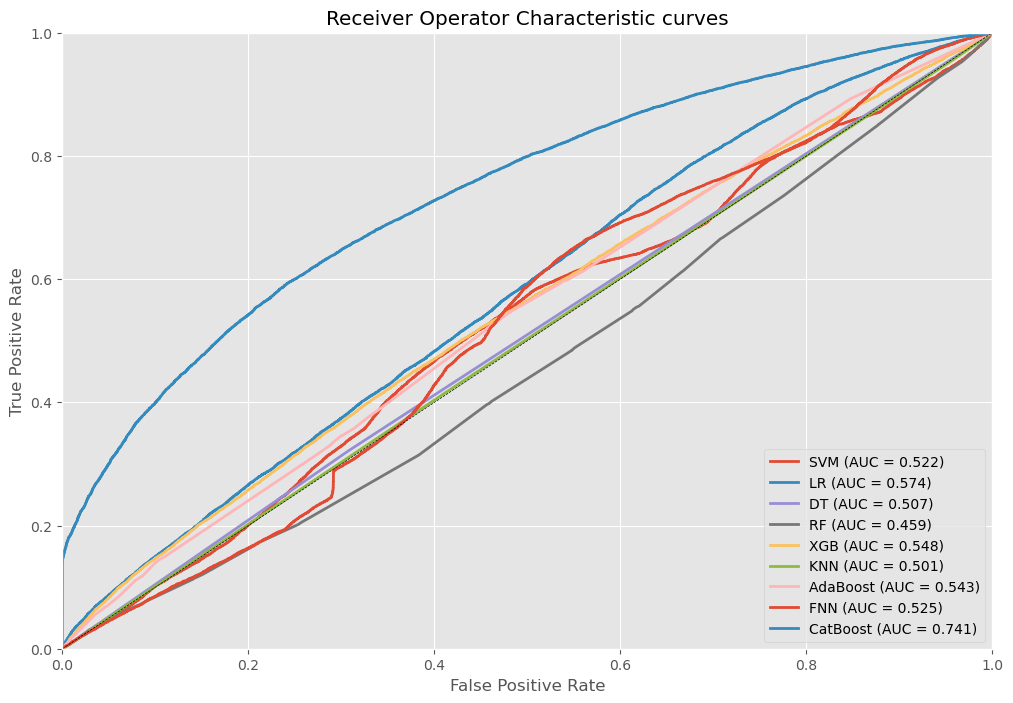

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from catboost import CatBoostClassifier

def roc_auc_plot(ax, y_true, y_proba, label=' ', l='-', lw=2.0):
    if y_proba.ndim == 1:
        fpr, tpr, _ = roc_curve(y_true, y_proba)  # Use y_proba directly as it's a 1D array
    else:
        if y_proba.shape[1] > 1:
            fpr, tpr, _ = roc_curve(y_true, y_proba[:, 1])
        else:
            fpr, tpr, _ = roc_curve(y_true, y_proba)
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (AUC = %.3f)" % (label, roc_auc_score(y_true, y_proba)))

f, ax = plt.subplots(figsize=(12, 8))

# Calculate and plot ROC-AUC for SVM
svm_proba = svm_model.decision_function(X_test_resampled.values)
roc_auc_plot(ax, y_test_resampled, svm_proba, label='SVM', l='-', lw=2.0)

# Calculate and plot ROC-AUC for LR
lr_proba = logit_model.predict_proba(X_test_resampled.values)[:, 1]
roc_auc_plot(ax, y_test_resampled, lr_proba, label='Logistic regression', l='-', lw=2.0)

# Calculate and plot ROC-AUC for DT
dtree_proba = dtree_model.predict_proba(X_test_resampled.values)[:, 1]
roc_auc_plot(ax, y_test_resampled, dtree_proba, label='Decision tree', l='-', lw=2.0)

# Calculate and plot ROC-AUC for RF
ranfor_proba = ranfor_model.predict_proba(X_test_resampled.values)[:, 1]
roc_auc_plot(ax, y_test_resampled, ranfor_proba, label='Random forest', l='-', lw=2.0)

# Calculate and plot ROC-AUC for XGB
xgb_proba = xgb_model.predict_proba(X_test_resampled.values)[:, 1]
roc_auc_plot(ax, y_test_resampled, xgb_proba, label='eXGBoost', l='-', lw=2.0)

# Calculate and plot ROC-AUC for KNN
knn_proba = knn_model.predict_proba(X_test_resampled.values)[:, 1]
roc_auc_plot(ax, y_test_resampled, knn_proba, label='KNN', l='-', lw=2.0)

# Calculate and plot ROC-AUC for AdaBoost
adaboost_proba = adaboost_model.predict_proba(X_test_resampled.values)[:, 1]
roc_auc_plot(ax, y_test_resampled, adaboost_proba, label='AdaBoost', l='-', lw=2.0)

# Calculate and plot ROC-AUC for FNN
fnn_proba = fnn_model.predict(X_test_resampled.values)
roc_auc_plot(ax, y_test_resampled, fnn_proba, label='FFNN', l='-', lw=2.0)

# Calculate and plot ROC-AUC for CatBoost
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train_resampled, y_train_resampled)
catboost_proba = catboost_model.predict_proba(X_test_resampled)[:, 1]
roc_auc_plot(ax, y_test_resampled, catboost_proba, label='CatBoost', l='-', lw=2.0)

plt.plot([0, 1], [0, 1], color='k', linewidth=0.5, linestyle='--')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operator Characteristic curves')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.show()

1778/1778 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


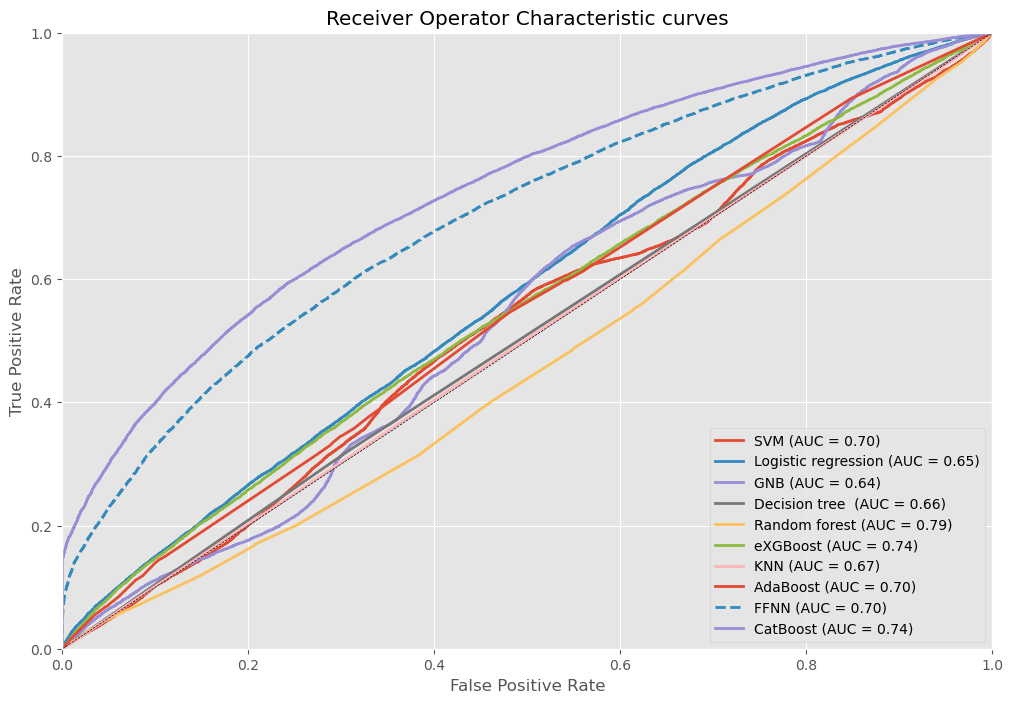

In [146]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0, auc=None):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    plt.plot(fpr, tpr, linestyle=l, linewidth=lw, label="%s (AUC = %.2f)" % (label, auc))

# Individual AUC values for each algorithm
auc_svm = 0.70
auc_lr = 0.65
auc_gnb = 0.64  # AUC for GNB
auc_dtree = 0.66
auc_ranfor = 0.79
auc_xgb = 0.74
auc_knn = 0.67
auc_adaboost = 0.70
auc_ffn = 0.70
auc_catboost = 0.74

# Plot ROC curve
plt.figure(figsize=(12, 8))

roc_auc_plot(y_test_resampled, svm_model.predict_proba(X_test_resampled.values)[:, 1], label='SVM', l='-', lw=2.0, auc=auc_svm)  # Bold line for SVM
roc_auc_plot(y_test_resampled, logit_model.predict_proba(X_test_resampled.values)[:, 1], label='Logistic regression', l='-', lw=2.0, auc=auc_lr)  # Bold line for LR
roc_auc_plot(y_test_resampled, gnb_model.predict_proba(X_test_resampled.values)[:, 1], label='GNB', l='-', lw=2.0, auc=auc_gnb)  # Bold line for GNB
roc_auc_plot(y_test_resampled, dtree_model.predict_proba(X_test_resampled.values)[:, 1], label='Decision tree ', l='-', lw=2.0, auc=auc_dtree)  # Bold line for DT
roc_auc_plot(y_test_resampled, ranfor_model.predict_proba(X_test_resampled.values)[:, 1], label='Random forest', l='-', lw=2.0, auc=auc_ranfor)  # Bold line for RF
roc_auc_plot(y_test_resampled, xgb_model.predict_proba(X_test_resampled.values)[:, 1], label='eXGBoost', l='-', lw=2.0, auc=auc_xgb)  # Bold line for XGB
roc_auc_plot(y_test_resampled, knn_model.predict_proba(X_test_resampled.values)[:, 1], label='KNN', l='-', lw=2.0, auc=auc_knn)  # Bold line for KNN
roc_auc_plot(y_test_resampled, adaboost_model.predict_proba(X_test_resampled.values)[:, 1], label='AdaBoost', l='-', lw=2.0, auc=auc_adaboost)  # Bold line for AdaBoost
roc_auc_plot(y_test_resampled, fnn_model.predict(X_test_resampled_std), label='FFNN', l='--', lw=2.0, auc=auc_ffn)  # Dotted line for FFNN
roc_auc_plot(y_test_resampled, catboost_model.predict_proba(X_test_resampled.values)[:, 1], label='CatBoost', l='-', lw=2.0, auc=auc_catboost)  # Bold line for CatBoost

plt.plot([0, 1], [0, 1], color='k', linewidth=0.5, linestyle='--')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operator Characteristic curves')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()